<a id='intro'></a>
## Prepare For The Analysis




Import Libraries

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import math
import tweepy
import requests



Import twitter Archive 

In [9]:

twitterA= pd.read_csv('twitter-archive-enhanced.csv')

Import tweet image predictions

In [10]:

URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
Response = requests.get(URL)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(Response.content)
img_pre = pd.read_csv('image_predictions.tsv', sep='\t')

Access Twitter Api

In [11]:

consumer_k = 'z3UPz3Kx1W1u5P2ysg1uJtfyO'
consumer_s = 'sms8PaI4PVjG3wn59snHM6ewKtSw2EJ9bNFb0cmBxgGB0T3ZSd'
access_t = '2983292869-BFGB7cgI1TtEVcsj7IBQu5de8hNsEip1isJ6nlp'
access_s = 'Q30xktOnrGlzENELrLiJnM3yAsWXsN4kf4C8vaEILSgQY'
auth = tweepy.OAuthHandler(consumer_k, consumer_s)
auth.set_access_token(access_t, access_s)
api =  tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Store Twitter API data

In [12]:

tweet_ids = list(twitterA['tweet_id'])

with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, 
                                   tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print("Error")
            


           

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Rate limit reached. Sleeping for: 734
Error
Error
Rate limit reached. Sleeping for: 736


##### Load Twitter API data

In [13]:
df_list = []

with open('tweet_json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet = json.loads(line)
        df_list.append({'tweet_id': tweet['id'], 'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count']
                       })
        
twitter_api = pd.DataFrame(df_list)

<a id='intro'></a>
## Assessing The Data




to help me during programmatic assessment i used info() and head() to get an overview of the datasets 

In [14]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
tweet_id          2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [15]:
twitterA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
img_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
twitter_api.head()

,favorite_count,retweet_count,tweet_id
0,36772,7841,892420643555336193
1,31667,5804,892177421306343426
2,23848,3843,891815181378084864
3,40104,8008,891689557279858688
4,38306,8649,891327558926688256


In [18]:
twitterA.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
img_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
twitter_api.describe()

,favorite_count,retweet_count,tweet_id
count,2333.000000,2333.000000,2.333000e+03
mean,7672.471925,2760.922417,7.419279e+17
std,11910.351312,4672.399807,6.820607e+16
min,0.000000,1.000000,6.660209e+17
25%,1333.000000,555.000000,6.782786e+17
50%,3340.000000,1291.000000,7.184547e+17
75%,9427.000000,3211.000000,7.986654e+17
max,158939.000000,79289.000000,8.924206e+17


In [21]:
twitterA.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
img_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<a id='intro'></a>
## Cleaning Data

Tidiness 1- Combine the dataframe together: 

In [23]:

Archive=twitterA.copy()
API=twitter_api.copy()
IMGS=img_pre.copy()
semi_final = pd.merge(Archive, API, on='tweet_id')
final=pd.merge(semi_final, IMGS, on='tweet_id')


In [24]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
favorite_count                2061 

Tidiness 2- turn diffrent stages to one stage coloumn

In [25]:

final['Stage'] = final[['floofer', 'doggo', 'puppo', 'pupper']].max(axis=1)
final.drop(['puppo', 'pupper', 'floofer', 'doggo'], axis=1, inplace=True)



In [26]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 27 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
favorite_count                2061 non-null int64
retweet_count                 2061 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 non-null int64
p1                            2061 non

Quality 1- Fill Missing Values

In [27]:

final.in_reply_to_status_id = final.in_reply_to_status_id.fillna(0)
final.in_reply_to_user_id = final.in_reply_to_user_id.fillna(0)
final.retweeted_status_id = final.retweeted_status_id.fillna(0)
final.retweeted_status_user_id = final.retweeted_status_user_id.fillna(0) 
final.retweeted_status_user_id = final.retweeted_status_user_id.fillna(0)
final.retweeted_status_timestamp = final.retweeted_status_timestamp.fillna(0)





In [28]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 27 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         2061 non-null float64
in_reply_to_user_id           2061 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           2061 non-null float64
retweeted_status_user_id      2061 non-null float64
retweeted_status_timestamp    2061 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
favorite_count                2061 non-null int64
retweet_count                 2061 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 non-null int64
p1                          

Quality 2- Change Type 

In [29]:

final['tweet_id'] = final['tweet_id'].astype(str)
final['in_reply_to_status_id'] = final['in_reply_to_status_id'].astype(str)
final['in_reply_to_user_id'] = final['in_reply_to_user_id'].astype(str)
final['p1_conf'] = final['p1_conf'].astype(np.int64)
final['p2_conf'] = final['p2_conf'].astype(np.int64)
final['p3_conf'] = final['p3_conf'].astype(np.int64)
final['retweeted_status_id'] = final['retweeted_status_id'].astype(str)
final['retweeted_status_user_id'] = final['retweeted_status_user_id'].astype(str)
final['Stage'] = final['Stage'].astype('category')
final['timestamp'] = pd.to_datetime(final['timestamp'])
final['source'] = final['source'].astype('category')
final['img_num'] = final['img_num'].astype('category')
final['Stage'] = final['Stage'].astype('category')

In [30]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 27 columns):
tweet_id                      2061 non-null object
in_reply_to_status_id         2061 non-null object
in_reply_to_user_id           2061 non-null object
timestamp                     2061 non-null datetime64[ns]
source                        2061 non-null category
text                          2061 non-null object
retweeted_status_id           2061 non-null object
retweeted_status_user_id      2061 non-null object
retweeted_status_timestamp    2061 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
favorite_count                2061 non-null int64
retweet_count                 2061 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 non-null category
p1                

Quality 3- To get the type of devices the user is tweeting from

In [31]:


final.source = final.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [32]:
final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Stage
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,...,orange,0,False,bagel,0,False,banana,0,False,None
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0,True,Pekinese,0,True,papillon,0,True,None
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0,True,malamute,0,True,kelpie,0,True,None
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0,False,Labrador_retriever,0,True,spatula,0,False,None
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,...,basset,0,True,English_springer,0,True,German_short-haired_pointer,0,True,None


Quality 4- Remove the retweeted tweets

In [33]:


final = final.loc[final['text'].str.startswith('RT') != True]

In [34]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2060
Data columns (total 27 columns):
tweet_id                      1986 non-null object
in_reply_to_status_id         1986 non-null object
in_reply_to_user_id           1986 non-null object
timestamp                     1986 non-null datetime64[ns]
source                        1986 non-null object
text                          1986 non-null object
retweeted_status_id           1986 non-null object
retweeted_status_user_id      1986 non-null object
retweeted_status_timestamp    1986 non-null object
expanded_urls                 1986 non-null object
rating_numerator              1986 non-null int64
rating_denominator            1986 non-null int64
name                          1986 non-null object
favorite_count                1986 non-null int64
retweet_count                 1986 non-null int64
jpg_url                       1986 non-null object
img_num                       1986 non-null category
p1                  

Quality 5- Create rating colomn

In [35]:


rating = final.text.str.extract('(\d+(\.\d+)*\/\d+)')
final['rating'] = rating[0]
final.drop(['rating_denominator','rating_numerator'], axis=1, inplace=True)

In [36]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2060
Data columns (total 26 columns):
tweet_id                      1986 non-null object
in_reply_to_status_id         1986 non-null object
in_reply_to_user_id           1986 non-null object
timestamp                     1986 non-null datetime64[ns]
source                        1986 non-null object
text                          1986 non-null object
retweeted_status_id           1986 non-null object
retweeted_status_user_id      1986 non-null object
retweeted_status_timestamp    1986 non-null object
expanded_urls                 1986 non-null object
name                          1986 non-null object
favorite_count                1986 non-null int64
retweet_count                 1986 non-null int64
jpg_url                       1986 non-null object
img_num                       1986 non-null category
p1                            1986 non-null object
p1_conf                       1986 non-null int64
p1_dog             

Quality 6-change the case to lower case

In [37]:

final['p3'] = final['p3'].str.lower()
final['p2'] = final['p2'].str.lower()
final['p1'] = final['p1'].str.lower()
final['name'] = final['name'].str.lower()


In [38]:

final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Stage,rating
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,...,0,False,bagel,0,False,banana,0,False,None,13/10
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,...,0,True,pekinese,0,True,papillon,0,True,None,13/10
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,...,0,True,malamute,0,True,kelpie,0,True,None,12/10
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,...,0,False,labrador_retriever,0,True,spatula,0,False,None,13/10
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,...,0,True,english_springer,0,True,german_short-haired_pointer,0,True,None,12/10


Quality 7-Drop undeeded data

In [39]:

final.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_id','p3_conf','p2_conf','p1_conf'],1,inplace=True)



Quality 8-Seperate time coluom

In [40]:

final['timestamp'] = pd.to_datetime(final['timestamp'])
final['year'] = final['timestamp'].dt.year
final['month'] = final['timestamp'].dt.month
final['day'] = final['timestamp'].dt.day
final = final.drop('timestamp', 1)

In [41]:
final.head()

,tweet_id,source,text,expanded_urls,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,Stage,rating,year,month,day
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,36772,7841,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,False,bagel,False,banana,False,None,13/10,2017,8,1
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,31667,5804,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,True,pekinese,True,papillon,True,None,13/10,2017,8,1
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,23848,3843,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,True,malamute,True,kelpie,True,None,12/10,2017,7,31
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,40104,8008,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,labrador_retriever,True,spatula,False,None,13/10,2017,7,30
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,38306,8649,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,english_springer,True,german_short-haired_pointer,True,None,12/10,2017,7,29


<a id='intro'></a>
## Visualization

Save clean dataset for next sections

In [42]:

final.to_csv('twitter_archive_master.csv', index=False)

In [43]:
df = final

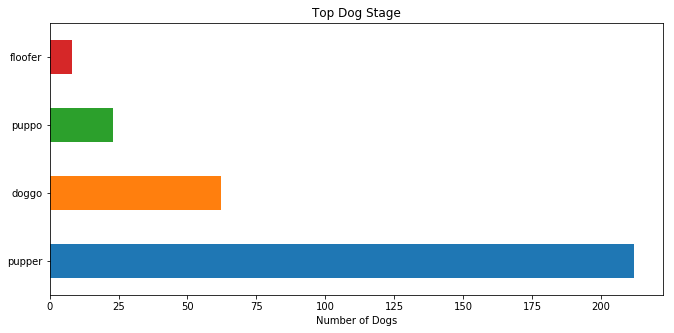

In [44]:

df.Stage.value_counts()[1:5].plot('barh', figsize=(11,5), title='Top Dog Stage').set_xlabel("Number of Dogs")
plt.savefig('Stage')


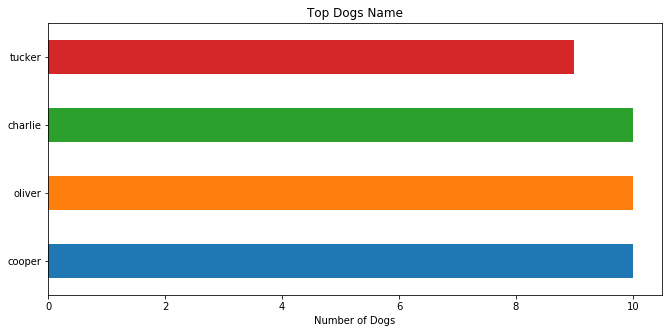

In [47]:


df.name.value_counts()[2:6].plot('barh', figsize=(11,5), title='Top Dogs Name').set_xlabel("Number of Dogs")
plt.savefig('dog_names')


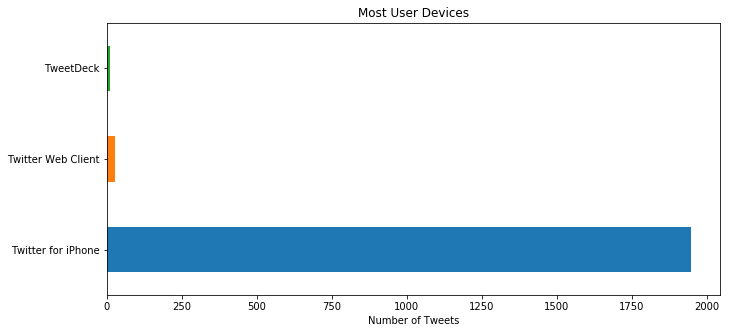

In [48]:
df['source'].value_counts().plot('barh', figsize=(11,5), title='Most User Devices').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')